# Feature Engineering
#### Missing Data
- Missing data at Random(MCAR)
- Missing data not at Random

# Importing Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing completely data at Random

In [5]:
#Missing data at Random
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

# percentage of null values
df['Cabin_null'].mean()*100

77.10437710437711

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [8]:
df.groupby('Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

#### Types to handle missing data
1. Mean/Median/Mode replacement
2. Random Sample imputation
3. Capturing NaN values with a new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent category imputation


#### Mean/Median/Mode replacement
###### When?

Mean/Median/Mode replacement has the assumption the data is missing completely at random

###### Solution:

Replace the most frequent occurance of variable

In [9]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
#percentage of null valus
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [19]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [20]:
impute_nan(df,'Age',median)

In [22]:
median=df.Age.median()
median

28.0

In [23]:
df.Age_median.isnull().sum()

0

In [24]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


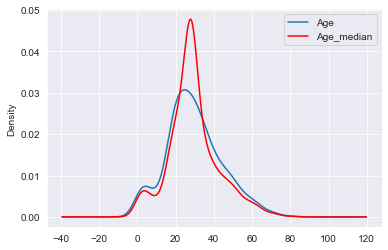

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantage and Disadvantage of Mean/Median imputation

#### Advantages
1. Easy to implement
2. Faster way to obtain the complete dataset

#### Disadvantages
3. Change or Distortion in the original variance